In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [29]:
train_id = train['Id']
test_id = test['Id']
target = train['SalePrice']

In [30]:
train.drop('Id', axis = 1, inplace = True) 

In [32]:
test.drop('Id', axis = 1, inplace = True)

In [34]:
train['SalePrice'] = np.log1p(train['SalePrice'])

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


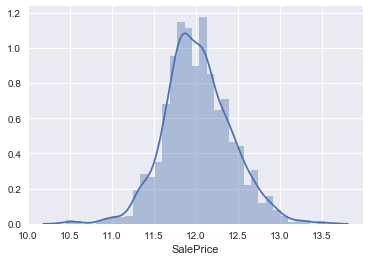

In [35]:
sns.distplot(train.SalePrice)

In [40]:
mean, sd = norm.fit(train.SalePrice)

In [41]:
n_train = train.shape[0]
n_test = test.shape[0]

In [46]:
y_train = train['SalePrice'].values

In [49]:
df = pd.concat((train, test)).reset_index(drop=True)

In [51]:
df.drop('SalePrice', axis=1, inplace=True)

In [53]:
df.shape

(2919, 79)

In [61]:
df.isnull().sum().sort_values(ascending=False)[:34]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

In [64]:
df['PoolQC'] = df['PoolQC'].fillna('None')

In [65]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [66]:
df['Alley'] = df['Alley'].fillna('None')

In [67]:
df['Fence'] = df['Fence'].fillna('None')

In [68]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [73]:
df.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [74]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [75]:
df['GarageType'] = df['GarageType'].fillna('None')

In [76]:
df['GarageFinish'] = df['GarageFinish'].fillna('None')

In [77]:
df['GarageQual'] = df['GarageQual'].fillna('None')

In [78]:
df['GarageCond'] = df['GarageCond'].fillna('None')

In [79]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [80]:
df['GarageArea'] = df['GarageArea'].fillna(0)

In [81]:
df['GarageCars'] = df['GarageCars'].fillna(0)

In [82]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)

In [83]:
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)

In [84]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)

In [85]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [86]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)

In [87]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [88]:
df['BsmtQual'] = df['BsmtQual'].fillna('None')

In [89]:
df['BsmtCond'] = df['BsmtCond'].fillna('None')

In [90]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')

In [91]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')

In [92]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [93]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [94]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [103]:
df['MSZoning'] = df['MSZoning'].fillna('RL')

In [105]:
df = df.drop(['Utilities'], axis = 1)

In [107]:
df['Functional'] = df['Functional'].fillna('Typ')

In [109]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [114]:
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')

In [115]:
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')

In [118]:
df['KitchenQual'] = df['KitchenQual'].fillna('TA')

In [119]:
df['SaleType'] = df['SaleType'].fillna('WD')

In [120]:
df.isnull().sum().sort_values(ascending=False)

YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
FullBath         0
Electrical       0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
EnclosedPorch    0
Condition2       0
YearRemodAdd     0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
                ..
RoofMatl         0
SaleCondition    0
Heating          0
SaleType         0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
Neighborhood     0
MoSold           0
MiscVal          0
MiscFeature      0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig   

**All missing value has been imputed with either the most frequent, 0, or None**

In [124]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object


**Need to change some numerical into categorical and vice versa**

In [125]:
#MSSubClass
#Overall cond
#OverallQual -- maybe not this...too strong of a correlation as a numerical dataset
#Yrsold
#Mosold


In [129]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [133]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] 

#maybe take away total bsmtsf
#maybe add totalbsmt + porchsq


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
cat_columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
               'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
               'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
               'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
               'YrSold', 'MoSold')

In [137]:
for cat in cat_columns:
    label = LabelEncoder()
    label.fit(list(df[cat].values))
    df[cat] = label.transform(list(df[cat].values))

In [146]:
num_data = df.dtypes[df.dtypes != 'object'].index

In [149]:
skewed_data = df[num_data].apply(lambda x: skew(x))

In [152]:
from scipy.special import boxcox1p

In [166]:
skewed = skewed_data[abs(skewed_data) > 1.0]

In [168]:
skewed.index

Index(['1stFlrSF', '3SsnPorch', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFinType2', 'BsmtHalfBath', 'CentralAir',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence', 'Functional',
       'GarageCond', 'GarageQual', 'GarageYrBlt', 'GrLivArea', 'KitchenAbvGr',
       'KitchenQual', 'LandSlope', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PavedDrive', 'PoolArea',
       'PoolQC', 'ScreenPorch', 'Street', 'TotalBsmtSF', 'WoodDeckSF',
       'TotalSF'],
      dtype='object')

In [169]:
for i in skewed.index:
    df[i] = boxcox1p(df[i], 0.20)

In [170]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,14.300394,854,0.0,1,3,1Fam,1.898648,1.597540,13.571795,0.0,...,WD,0.0,0.743492,8,14.300394,0.000000,2003,2003,2,19.035612
1,15.856944,0,0.0,1,3,1Fam,1.898648,0.743492,14.821045,0.0,...,WD,0.0,0.743492,6,15.856944,10.635229,1976,1976,1,18.956440
2,14.580417,866,0.0,1,3,1Fam,1.898648,1.228655,12.237560,0.0,...,WD,0.0,0.743492,6,14.580417,0.000000,2001,2002,2,19.292245
3,14.751724,756,0.0,1,3,1Fam,0.743492,1.597540,9.664321,0.0,...,WD,0.0,0.743492,7,13.827349,0.000000,1915,1970,0,18.858874
4,15.455351,1053,0.0,1,4,1Fam,1.898648,0.000000,13.295773,0.0,...,WD,0.0,0.743492,9,15.455351,9.324566,2000,2000,2,20.340971


In [236]:
df = pd.get_dummies(df)

(2919, 221)

In [225]:
c_train = df[:n_train]
c_test = df[n_train:]


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,14.300394,854,0.000000,1,3,1.898648,1.597540,13.571795,0.000000,2,...,0,0,0,0,0,0,0,0,0,1
1,15.856944,0,0.000000,1,3,1.898648,0.743492,14.821045,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2,14.580417,866,0.000000,1,3,1.898648,1.228655,12.237560,0.000000,2,...,0,0,0,0,0,0,0,0,0,1
3,14.751724,756,0.000000,1,3,0.743492,1.597540,9.664321,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
4,15.455351,1053,0.000000,1,4,1.898648,0.000000,13.295773,0.000000,2,...,0,0,0,0,0,0,0,0,0,1
5,14.022241,566,10.858825,1,1,1.898648,1.597540,13.706425,0.000000,2,...,0,0,0,0,0,0,0,0,0,1
6,17.120959,0,0.000000,1,3,1.898648,0.000000,16.198939,0.000000,2,...,0,0,0,0,0,0,0,0,0,1
7,15.317860,983,0.000000,1,3,1.898648,1.228655,14.313887,5.061733,0,...,0,0,0,0,0,0,0,0,0,1
8,14.996092,752,0.000000,1,2,1.898648,1.597540,0.000000,0.000000,6,...,0,0,0,0,0,0,0,0,0,1
9,15.206624,0,0.000000,1,2,1.898648,1.597540,14.277820,0.000000,2,...,0,0,0,0,0,0,0,0,0,1


# **SEXY SEXY MODELING**



In [181]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, 
from xgboost import XGBRegressor

In [184]:
X = c_train
y = target

In [185]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [202]:
model = XGBRegressor()
model_xgb = model.fit(train_X, train_y)

In [207]:
predict_train = model.predict(train_X)
predict_train

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x117fa6400>>
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x117f7c278>>
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


array([ 231819.734375,  146902.421875,  264052.      , ...,  132255.515625,
        154576.      ,  170250.296875], dtype=float32)

In [189]:
predict = model.predict(test_X)
predict

array([ 127340.0234375,  242214.296875 ,  109737.796875 ,  170043.4375   ,
        237343.9375   ,  146482.90625  ,  367801.625    ,  123742.390625 ,
        220799.84375  ,  152877.859375 ,   99761.96875  ,  131296.203125 ,
        232323.046875 ,  133877.       ,  314254.34375  ,  319087.5625   ,
        369459.46875  ,  200582.390625 ,  126343.78125  ,  148059.90625  ,
        150306.609375 ,  199062.765625 ,  177743.09375  ,  145749.359375 ,
        127088.96875  ,  218795.703125 ,  141611.40625  ,  136190.       ,
        109999.75     ,  142506.3125   ,  154826.9375   ,  188423.78125  ,
         63847.3515625,  219044.46875  ,  212295.65625  ,  229484.65625  ,
        128552.078125 ,  124365.2421875,  175288.6875   ,  212481.375    ,
        196058.765625 ,  308543.90625  ,  141328.453125 ,  134932.84375  ,
        313381.84375  ,  269121.96875  ,  350632.375    ,  254122.453125 ,
        241400.53125  ,   74460.671875 ,  233361.4375   ,  297729.5      ,
        263871.59375  ,  

In [218]:
mse = ((np.log(predict_train) - np.log(train_y))**2/len(train_X))

In [223]:
rootmse = np.sqrt(mse)
rootmse.mean()

0.0018525597165147739

In [198]:
from sklearn.metrics import mean_absolute_error

In [196]:
mean_absolute_error(predict, test_y)

15153.336472602739

In [197]:
mean_squared_error(predict,test_y)

719725684.46250474

In [240]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_X, train_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [241]:
rmse_cv().mean()

TypeError: estimator should be an estimator implementing 'fit' method, array([ 127340.0234375,  242214.296875 ,  109737.796875 ,  170043.4375   ,
        237343.9375   ,  146482.90625  ,  367801.625    ,  123742.390625 ,
        220799.84375  ,  152877.859375 ,   99761.96875  ,  131296.203125 ,
        232323.046875 ,  133877.       ,  314254.34375  ,  319087.5625   ,
        369459.46875  ,  200582.390625 ,  126343.78125  ,  148059.90625  ,
        150306.609375 ,  199062.765625 ,  177743.09375  ,  145749.359375 ,
        127088.96875  ,  218795.703125 ,  141611.40625  ,  136190.       ,
        109999.75     ,  142506.3125   ,  154826.9375   ,  188423.78125  ,
         63847.3515625,  219044.46875  ,  212295.65625  ,  229484.65625  ,
        128552.078125 ,  124365.2421875,  175288.6875   ,  212481.375    ,
        196058.765625 ,  308543.90625  ,  141328.453125 ,  134932.84375  ,
        313381.84375  ,  269121.96875  ,  350632.375    ,  254122.453125 ,
        241400.53125  ,   74460.671875 ,  233361.4375   ,  297729.5      ,
        263871.59375  ,  114326.8046875,  150379.984375 ,  189851.421875 ,
        190795.96875  ,  165481.5625   ,  121660.8515625,  144090.       ,
        156478.28125  ,  122228.9609375,  231359.96875  ,  181416.1875   ,
        165705.21875  ,  111478.4609375,  207505.296875 ,  119339.671875 ,
        373030.625    ,  149256.890625 ,  129546.421875 ,  194292.46875  ,
        149073.75     ,  214489.6875   ,  208492.578125 ,  101031.2578125,
        189897.625    ,  154500.953125 ,  187349.8125   ,  266066.       ,
        121648.4375   ,  134233.5      ,  112815.3203125,  132224.390625 ,
        121732.2890625,  117271.765625 ,  298784.125    ,  104179.6875   ,
        218868.78125  ,  132377.03125  ,  164962.390625 ,  134371.5      ,
        212723.9375   ,  322779.03125  ,  177146.34375  ,  291801.90625  ,
        127294.890625 ,  215912.046875 ,  190153.21875  ,  224834.125    ,
        252479.8125   ,  178021.984375 ,  350696.875    ,  180945.53125  ,
        118411.5625   ,  211873.328125 ,  128753.6328125,  186659.875    ,
        212760.703125 ,  135592.953125 ,  117216.671875 ,  120385.4609375,
        165763.890625 ,  134410.84375  ,  192443.140625 ,  249071.515625 ,
        112689.4140625,  230339.40625  ,  140270.3125   ,  236508.390625 ,
        118013.1640625,  239664.265625 ,  156394.484375 ,  199488.71875  ,
        240314.1875   ,  218627.734375 ,  217826.40625  ,  135965.640625 ,
        286469.90625  ,  374033.       ,  143054.90625  ,  201601.96875  ,
        141019.65625  ,  112235.859375 ,  146544.359375 ,  226270.640625 ,
        310647.40625  ,  140624.375    ,  115875.53125  ,  159186.46875  ,
         82622.7890625,  151150.859375 ,  185772.28125  ,  266226.9375   ,
        126374.234375 ,  199517.15625  ,  165538.875    ,  186905.40625  ,
        183658.921875 ,  119045.5859375,  281293.28125  ,  177968.421875 ,
        137820.484375 ,  183451.75     ,  171111.640625 ,  219797.125    ,
        131791.03125  ,  147547.484375 ,  232134.9375   ,  143452.265625 ,
         93351.3828125,   86809.4921875,  299816.65625  ,  322219.09375  ,
        218649.84375  ,  165527.3125   ,  143818.671875 ,  151228.375    ,
        121313.515625 ,  218197.6875   ,  280346.875    ,  275192.625    ,
        248473.9375   ,   91463.9375   ,  240521.53125  ,  173995.359375 ,
        219203.375    ,  203939.359375 ,  119862.0625   ,  142675.359375 ,
        254471.875    ,  107730.671875 ,  184653.515625 ,  136456.78125  ,
        240496.34375  ,   82106.0390625,  209508.984375 ,  249262.1875   ,
        140238.984375 ,  129940.296875 ,  145548.265625 ,  323541.03125  ,
        186963.9375   ,  100295.4140625,  174001.265625 ,  224285.90625  ,
        150526.75     ,   88341.3359375,  162772.515625 ,  184041.078125 ,
        206674.125    ,  417064.21875  ,   83026.0625   ,  455809.6875   ,
        119113.734375 ,  147359.125    ,  225212.265625 ,  337778.90625  ,
        124386.265625 ,  251851.703125 ,  129929.703125 ,  157999.28125  ,
        241701.78125  ,  142601.4375   ,  195206.484375 ,  242543.84375  ,
        146291.8125   ,  285721.125    ,  132898.28125  ,  144684.890625 ,
        191126.734375 ,  235116.015625 ,  138479.296875 ,  129232.953125 ,
        365877.28125  ,  126032.0390625,  112464.796875 ,  268337.1875   ,
        203364.15625  ,  207687.828125 ,  120374.578125 ,  239226.234375 ,
        269979.34375  ,  123114.640625 ,  170922.96875  ,  279954.75     ,
        175657.171875 ,  116425.6953125,  130633.6640625,  194665.96875  ,
        259969.96875  ,  225256.453125 ,  163571.78125  ,  136450.4375   ,
        119799.6875   ,  220936.796875 ,  183043.40625  ,  160143.125    ,
        175479.28125  ,  135289.765625 ,  208558.       ,  147743.65625  ,
        266911.3125   ,  135620.140625 ,  191327.375    ,  130959.1171875,
        185809.1875   ,  195616.375    ,  403340.46875  ,  119410.7890625,
        260859.765625 ,  111230.2421875,  347026.84375  ,  243701.390625 ,
        209567.140625 ,  181138.65625  ,  160493.71875  ,  114030.2421875,
        228867.75     ,   74705.25     ,  200572.265625 ,  209700.84375  ,
        104699.765625 ,  186255.46875  ,  129462.9921875,   90120.7265625,
        133380.265625 ,  292652.34375  ,  129462.484375 ,  148186.03125  ,
        196372.46875  ,  174514.890625 ,  166812.96875  ,  286215.59375  ,
         97481.       ,  191359.65625  ,  155915.3125   ,  122203.890625 ,
        154540.890625 ,  164367.46875  ,  197408.59375  ,  153480.609375 ], dtype=float32) was passed